In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


<AxesSubplot:>

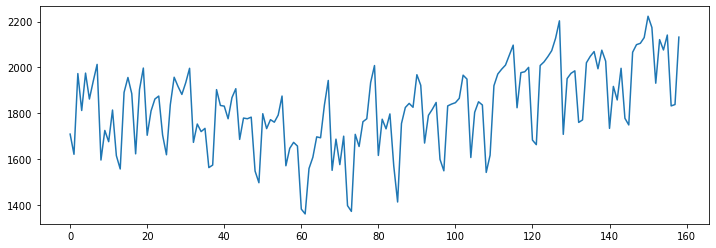

In [16]:

plt.figure(figsize=(12,4))
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()


In [17]:
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [18]:
13*12+3

159

# Splitting data [dont split randomly split at a point]

In [19]:

Train = Walmart.head(147)
Test = Walmart.tail(12)


# Moving Average [to get the trend we are doing MA]

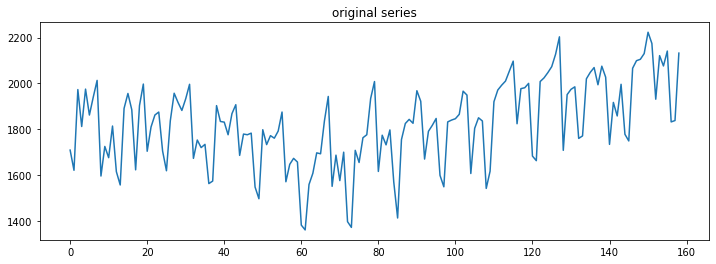

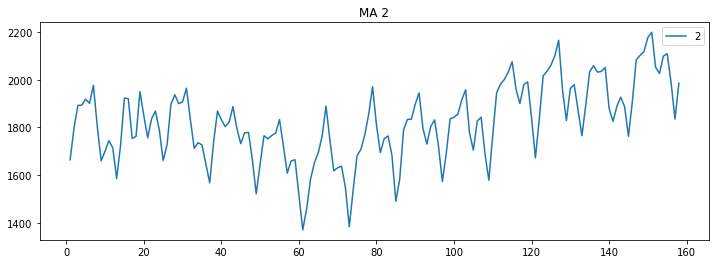

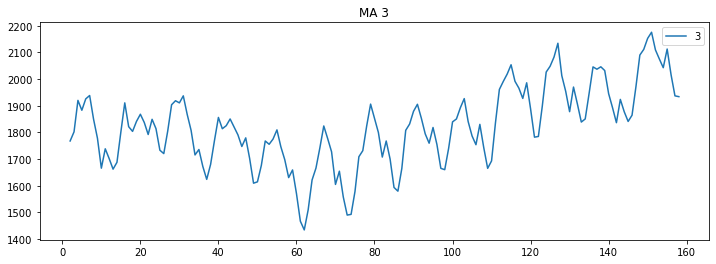

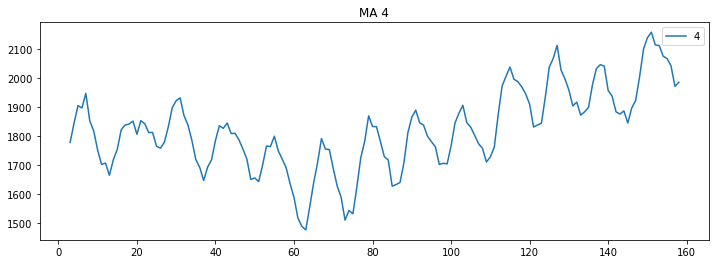

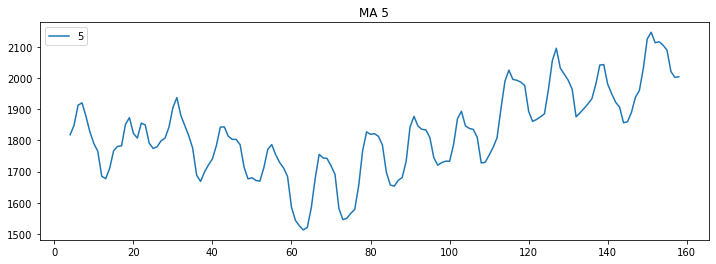

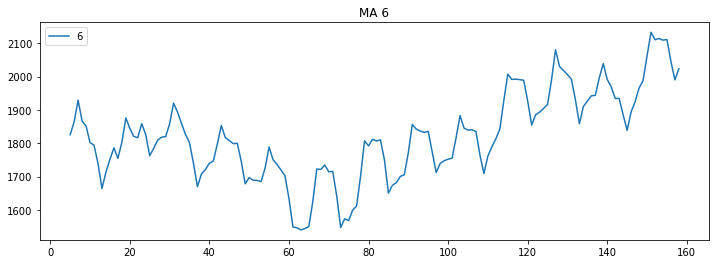

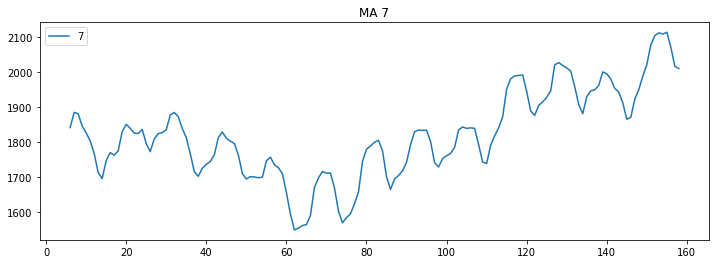

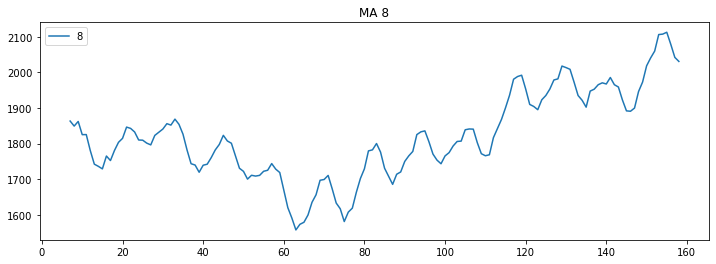

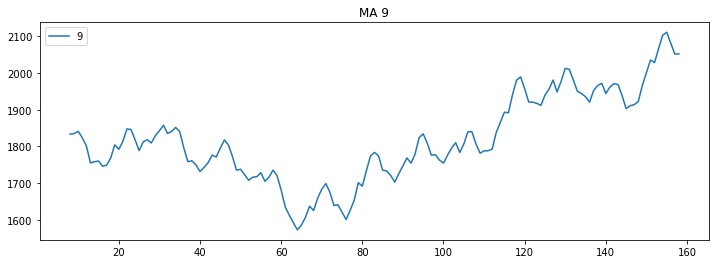

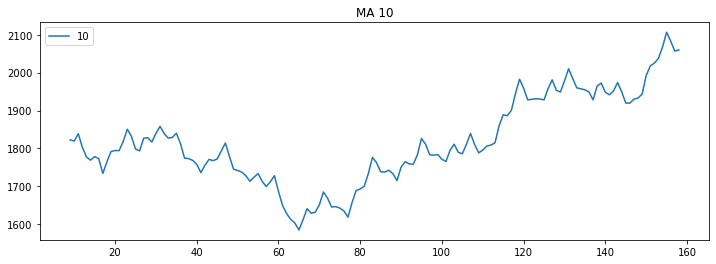

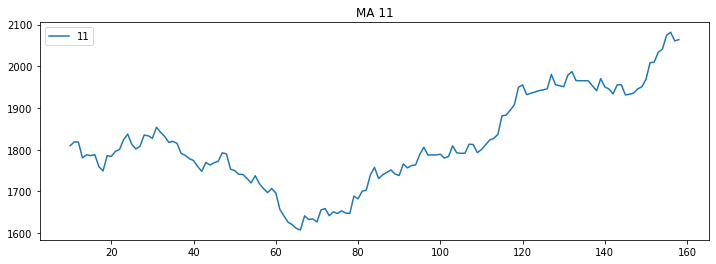

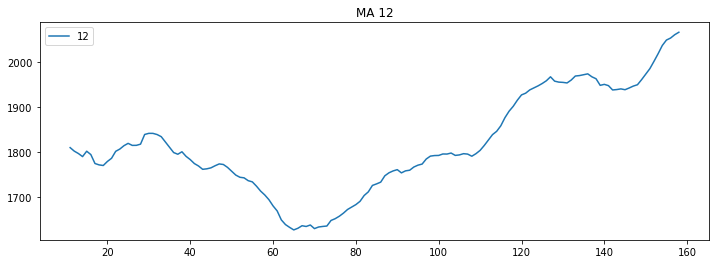

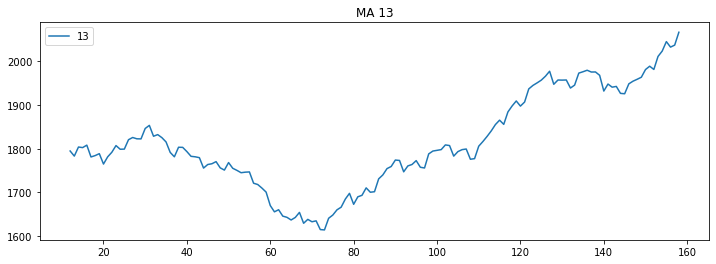

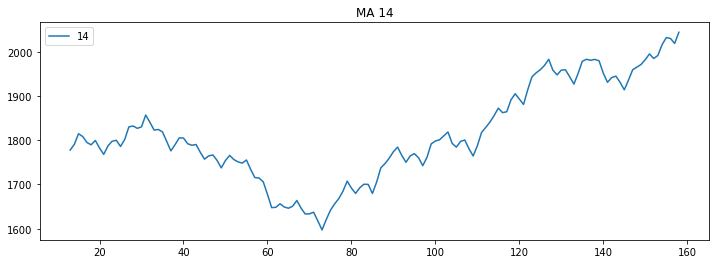

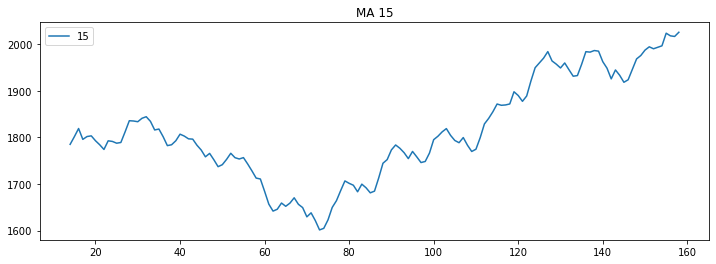

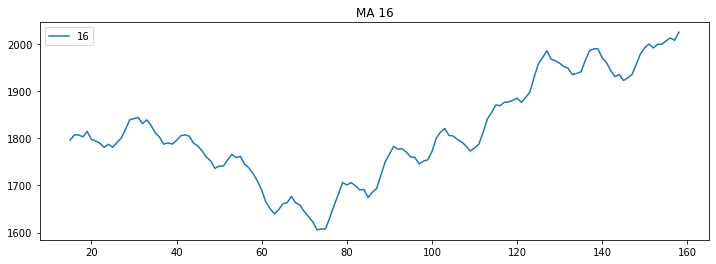

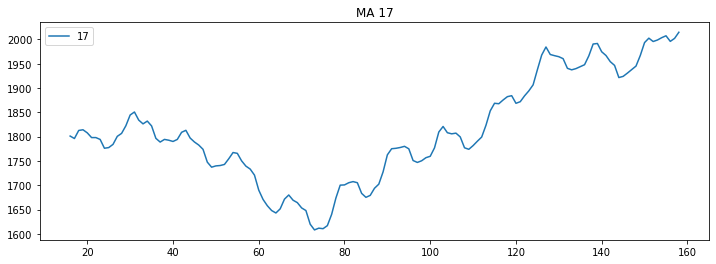

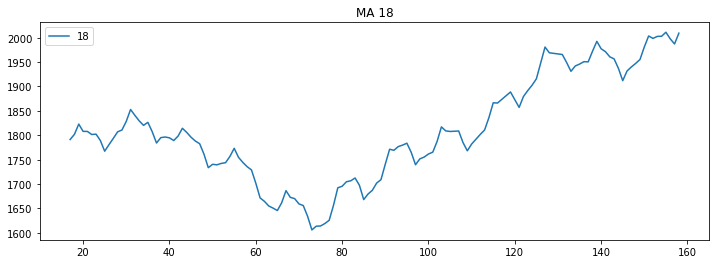

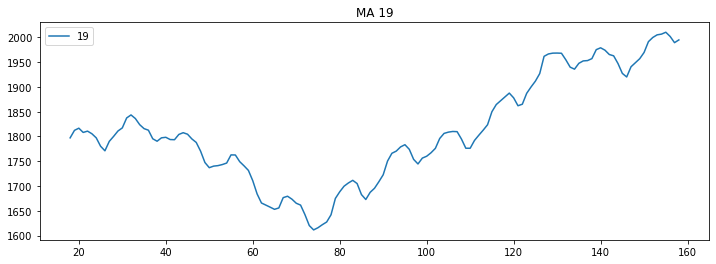

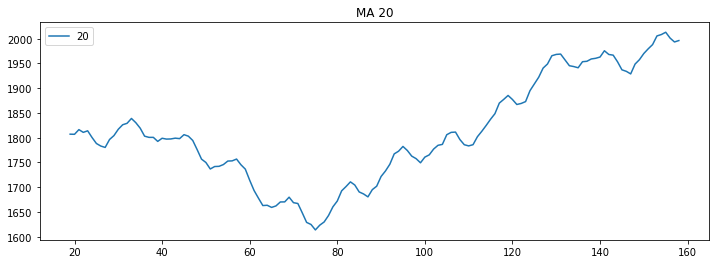

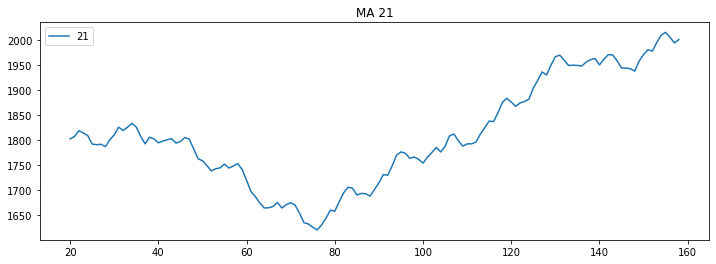

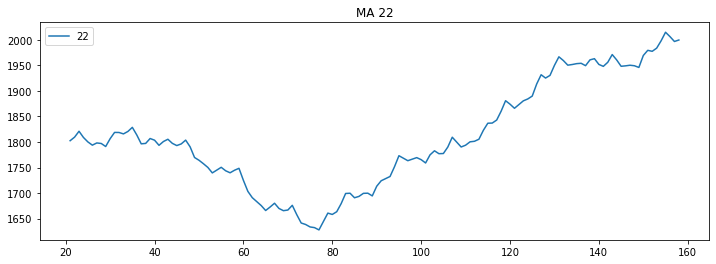

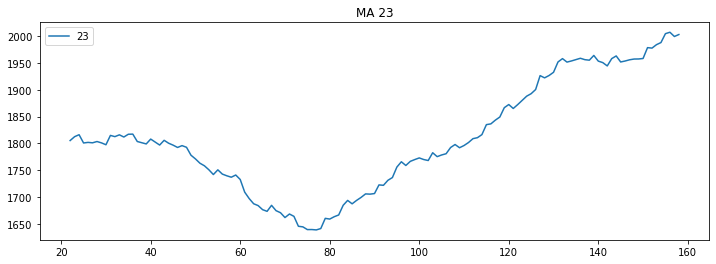

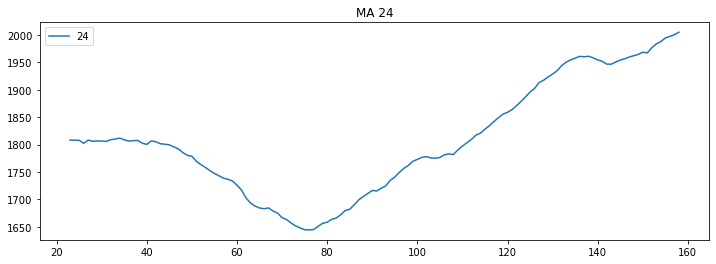

In [20]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))    #rolling means means moving avg
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

# Time series decomposition plot 


<ipython-input-21-9791417ef7de>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(Walmart.Footfalls,freq=12)


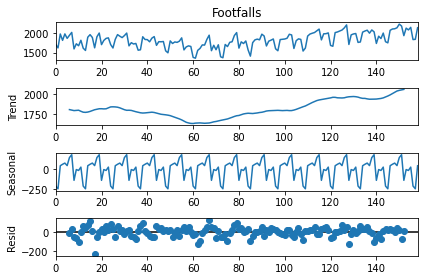

In [21]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,freq=12)   #freq=12 means window size optimal
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


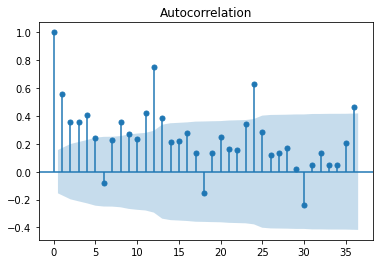

In [22]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=36)
#tsa_plots.plot_pacf(Walmart.Footfalls,lags=36)
plt.show()

### Evaluation Metric MAPE [mean absolut percentage error]

In [23]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [24]:
y=1000
y_pred=999

y=3
y_pred=2


(y-y_pred)/y

0.3333333333333333

In [25]:
Train["Footfalls"]

0      1709
1      1621
2      1973
3      1812
4      1975
       ... 
142    1858
143    1996
144    1778
145    1749
146    2066
Name: Footfalls, Length: 147, dtype: int64

In [26]:
Test.index[0]

147

In [27]:
Test.index[-1]

158

### Simple Exponential Method


In [28]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 


/Users/somenath/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


8.490637057828362

In [29]:
pred_ses

147    1913.677017
148    1913.677017
149    1913.677017
150    1913.677017
151    1913.677017
152    1913.677017
153    1913.677017
154    1913.677017
155    1913.677017
156    1913.677017
157    1913.677017
158    1913.677017
dtype: float64

In [30]:
import numpy as np
x=np.linspace(0.1,1,20)
for i in x :
    ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(pred_ses,Test.Footfalls) 
    print("smoothing_level ",i,"-->","MAPE Error",score)


smoothing_level  0.1 --> MAPE Error 8.156530408091852
smoothing_level  0.1473684210526316 --> MAPE Error 8.321758002376956
smoothing_level  0.19473684210526315 --> MAPE Error 8.477834428430482
smoothing_level  0.24210526315789474 --> MAPE Error 8.556761959917724
smoothing_level  0.2894736842105263 --> MAPE Error 8.557245105945034
smoothing_level  0.33684210526315794 --> MAPE Error 8.488246821828257
smoothing_level  0.38421052631578945 --> MAPE Error 8.359852829826279
smoothing_level  0.43157894736842106 --> MAPE Error 8.181437403786648
smoothing_level  0.4789473684210527 --> MAPE Error 7.961854148933533
smoothing_level  0.5263157894736842 --> MAPE Error 7.778452433428135
smoothing_level  0.5736842105263158 --> MAPE Error 7.572901228585715
smoothing_level  0.6210526315789474 --> MAPE Error 7.347653568372681
smoothing_level  0.6684210526315789 --> MAPE Error 7.104501250443916
smoothing_level  0.7157894736842105 --> MAPE Error 6.844867166526996
smoothing_level  0.7631578947368421 --> MAPE

### Holt method 

In [22]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)  #level=local avg,slope=trend
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

<ipython-input-22-9b7ea36ca4ed>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


7.546249229496066

In [23]:
pred_hw

147    2021.566977
148    2044.942083
149    2068.317189
150    2091.692296
151    2115.067402
152    2138.442509
153    2161.817615
154    2185.192721
155    2208.567828
156    2231.942934
157    2255.318040
158    2278.693147
dtype: float64

In [24]:
import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=i, smoothing_slope=j)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
        score=MAPE(pred_hw,Test.Footfalls)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))

<ipython-input-24-7e4659be63ba>:7: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=i, smoothing_slope=j)


smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 8.078386775911358
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 9.996241592864815
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 11.814210936285825
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 11.193588393027994
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 10.497647190133604
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 10.691351553947987
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 11.546218778762738
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 13.12808225527287
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 14.855497202804637
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 16.031509793202982
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 9.325503058036793
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 10.648723229671436
smoothing_level  0.19  smoothing_slop

In [30]:
a=pd.DataFrame(l,columns=["alpha","beta","score"])
a.sort_values(["score"])

,alpha,beta,score
80,0.82,0.10,5.617109
90,0.91,0.10,5.695907
71,0.73,0.19,6.321987
70,0.73,0.10,6.365030
61,0.64,0.19,6.630460
...,...,...,...
88,0.82,0.82,56.695154
97,0.91,0.73,59.287002
89,0.82,0.91,66.648350
98,0.91,0.82,69.918211


### Holts winter exponential smoothing with additive seasonality and additive trend


In [31]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 


2.6748196958856236

## Final Model by combining train and test

In [18]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()

/Users/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [19]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2134.775213
160    2163.742368
161    2116.063051
162    2219.340802
163    2259.752216
164    1928.850218
165    2066.682363
166    2048.655349
167    2096.982097
168    1863.374752
dtype: float64